# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [528]:
import csv, re
from pprint import pprint
def data_parser():
    with open("dictionary.csv") as indata:
        count = 0
        reader = csv.reader(indata)
        rawdata = list(reader)
        listofduplicates = []
    
        # Changes empty values in the parts of speech column to "none.", also merges info for duplicate words
        for index, line in enumerate(rawdata):
            if line[1] == "":
                line[1] = "none."
            if index > 0:
                prevline = rawdata[index - 1]
                if prevline[0] == line[0]:
                    line[2] = line[2] + "; " + prevline[2]
                    prevpartsofspeech = re.findall("[a-z]+.", prevline[1])
                    partsofspeech = re.findall("[a-z]+.", line[1])
                    for element in prevpartsofspeech:
                        if element not in partsofspeech:
                            partsofspeech.append(element)
                            line[1] = line[1] + " & " + element
                    listofduplicates.append(index - 1)
        # Removes the duplicates
        for index in listofduplicates[::-1]:
            rawdata.remove(rawdata[index])
        
        # Writes file
        with open("cleaneddictionary.csv", "w") as outdata:
            writer = csv.writer(outdata, lineterminator = "\n")
            writer.writerows(rawdata)
        
        pprint(rawdata[:30]) # only printed out the first 30 words to limit file size

############ Function Call ############
data_parser()

[['A',
  'none. & prep.',
  'An expletive, void of sense, to fill up the meter; A barbarous corruption '
  'of have, of he, and sometimes of it and of they.; Of.; In process of; in '
  'the act of; into; to; -- used with verbal substantives in -ing which begin '
  'with a consonant. This is a shortened form of the preposition an (which was '
  'used before the vowel sound); as in a hunting, a building, a begging.; In; '
  'on; at; by.; In each; to or for each; as, "twenty leagues a day", "a '
  'hundred pounds a year", "a dollar a yard", etc.; An adjective, commonly '
  'called the indefinite article, and signifying one or any, but less '
  'emphatically.; The name of the sixth tone in the model major scale (that in '
  'C), or the first tone of the minor scale, which is named after it the scale '
  'in A minor. The second string of the violin is tuned to the A in the treble '
  'staff. -- A sharp (A/) is the name of a musical tone intermediate between A '
  'and B. -- A flat (A/) is t

## Web Collection Requirement \#1


In [529]:
# Uses the lyricsgenius module: https://lyricsgenius.readthedocs.io/en/master/usage.html
# Note: Making the json files for each album is commented out, because once they were
#       made, I didn't need to make an updated version each time running the code

import json, lyricsgenius, pprint, re

def web_parser1():
    
    genius = lyricsgenius.Genius("ILC3HOAm3iGqpbV9DvrxKPLrw4bM4gsxj9tZpuxp6t4LZL2u7yEh-jwtSf_AXNQb")

    #album = genius.search_album("Taylor Swift (Deluxe)", "Taylor Swift")
    #album.save_lyrics() # .save_lyrics() creates a .json file for the album, including lyrics titled "Lyrics_[Title].json"
    album = open("Lyrics_TaylorSwiftDeluxe.json")
    debut = json.load(album)
    
    #album = genius.search_album("Fearless (Platinum Edition)", "Taylor Swift")
    #album.save_lyrics()
    album = open("Lyrics_FearlessPlatinumEdition.json")
    fearless = json.load(album)
    
    #album = genius.search_album("Speak Now (Deluxe)", "Taylor Swift")
    #album.save_lyrics()
    album = open("Lyrics_SpeakNowDeluxe.json")
    speaknow = json.load(album)
    
    #album = genius.search_album("Red (Deluxe Edition)", "Taylor Swift")
    #album.save_lyrics()
    album = open("Lyrics_RedDeluxeEdition.json")
    red = json.load(album)
    
    #album = genius.search_album("1989 (Deluxe)", "Taylor Swift")
    #album.save_lyrics()
    album = open("Lyrics_1989Deluxe.json")
    nineteen89 = json.load(album)
    
    #album = genius.search_album("reputation", "Taylor Swift")
    #album.save_lyrics()
    album = open("Lyrics_reputation.json")
    reputation = json.load(album)
    
    #album = genius.search_album("Lover", "Taylor Swift")
    #album.save_lyrics()
    album = open("Lyrics_Lover.json")
    lover = json.load(album)
    
    #album = genius.search_album("folklore (deluxe version)", "Taylor Swift")
    #album.save_lyrics()
    album = open("Lyrics_folkloredeluxeversion.json")
    folklore = json.load(album)
    
    #album = genius.search_album("evermore (deluxe version)", "Taylor Swift")
    #album.save_lyrics()
    album = open("Lyrics_evermoredeluxeversion.json")
    evermore = json.load(album)
    
    # Combines all of the albums into one dictionary
    newdict = {}
    newdict["1"] = debut
    newdict["2"] = fearless
    newdict["3"] = speaknow
    newdict["4"] = red
    newdict["5"] = nineteen89
    newdict["6"] = reputation
    newdict["7"] = lover
    newdict["8"] = folklore
    newdict["9"] = evermore

    # Formats titles in a standard way that will be used for the other files and gets rid of unnecessary characters in front of the titles that appear in the 8th and 9th albums
    for albumnum in newdict:
        for track in newdict[albumnum]["tracks"]:
            track["song"]["title"] = track["song"]["title"].strip().lower().replace("\'", "’").replace("...", "…").replace("&", "and").replace(".", "")
            if track["song"]["title"] == "mary’s song (oh my my my)":
                track["song"]["title"] = "mary’s song"
            if track["song"]["title"] == "come back… be here":
                track["song"]["title"] = "come back…be here"
    for track in newdict["8"]["tracks"]:
        track["song"]["title"] = track["song"]["title"][1::]
    for track in newdict["9"]["tracks"]:
        if track["number"] != 12 and track["number"] != 16:
            track["song"]["title"] = track["song"]["title"][1::]
        elif track["number"] == 12:
            track["song"]["title"] = "l" + track["song"]["title"][3::]
        else:
            track["song"]["title"] = "right where you left me"
            
    cleanedlyrics = ""
    newtrackdict = {}
    for albumnum in newdict:
        # Make the lyrics into one long string for each song, so it is easier to search through
        for track in newdict[albumnum]["tracks"]:
            for line in track["song"]["lyrics"]:
                cleanedlyrics += line.replace("\n", " ").replace("\'", "").replace("\u2005", " ").replace("\u205f", " ").replace("\u200b", "").lower()
            track["song"]["lyrics"] = cleanedlyrics
            cleanedlyrics = ""
         
            # Change tracks from a list to a dictionary, with titles as the keys, so it is easier to search by song title
            for element in track:
                innertrackdict = {}
            title = track["song"]["title"]
            newtrackdict[title] = track
        newdict[albumnum]["tracks"] = newtrackdict
        newtrackdict = {}
    
    json.dump(newdict, open("TSwift_Albums.json", "w"))
    
    pprint.pprint(newdict["9"]) # only printed the last album to limit file size
    
    #******Test Code*******
    #infile = open("TSwift_Albums.json")
    #dict = json.load(infile)
    #pprint.pprint(dict)
    #pprint.pprint(dict["9"]["tracks"]["gold rush"]["song"]["lyrics"])

    
    
############ Function Call ############
web_parser1()

{'_type': 'album',
 'api_path': '/albums/710147',
 'artist': {'_type': 'artist',
            'api_path': '/artists/1177',
            'header_image_url': 'https://images.genius.com/382ebc39e763a6d7b5fa7a2312d14905.1000x333x1.jpg',
            'id': 1177,
            'image_url': 'https://images.genius.com/3c1f124fcbbc2857a95e513fb34cc5a8.400x400x1.jpg',
            'index_character': 't',
            'iq': 1540,
            'is_meme_verified': True,
            'is_verified': True,
            'name': 'Taylor Swift',
            'slug': 'Taylor-swift',
            'url': 'https://genius.com/artists/Taylor-swift'},
 'cover_art_thumbnail_url': 'https://images.genius.com/a43146535419531bcf8b9dca82c68f85.300x300x1.png',
 'cover_art_url': 'https://images.genius.com/a43146535419531bcf8b9dca82c68f85.1000x1000x1.png',
 'full_title': 'evermore (deluxe version) by Taylor Swift',
 'id': 710147,
 'name': 'evermore (deluxe version)',
 'name_with_artist': 'evermore (deluxe version) (artist: Taylor S

                                           'api_path': '/songs/6260165',
                                           'artist': 'Taylor Swift',
                                           'full_title': '\u200bno body, no '
                                                         'crime by\xa0'
                                                         'Taylor\xa0Swift '
                                                         '(Ft.\xa0HAIM)',
                                           'header_image_thumbnail_url': 'https://images.genius.com/0f76756cfec00c6ca3acfea4a506ec9a.300x300x1.png',
                                           'header_image_url': 'https://images.genius.com/0f76756cfec00c6ca3acfea4a506ec9a.1000x1000x1.png',
                                           'id': 6260165,
                                           'instrumental': False,
                                           'lyrics': '[intro: haim] he did it '
                                                     'he did it 

## Web Collection Requirement #2

In [530]:
from bs4 import BeautifulSoup
from pprint import pprint
import requests
import re
def web_parser2():
    site = requests.get("https://kworb.net/spotify/artist/06HL4z0CvFAxyc27GXpf02.html")
    soup = BeautifulSoup(site.text, "html.parser")

    tagsoftracks = soup.find_all("a")
    tagsofstats = soup.find_all("td")
    listofnums = [num for num in range(1, 106)]
    listoftitles = []
    listofstreams = []
    listofglobalranks = []

    # Creates a list of all of the tracks listed on the site, and cleans formatting of the titles
    for track in tagsoftracks:
        trackhref = track.get("href")
        if "/track/" in trackhref:
            tracktitle = track.text.replace("â", "'").replace("â", "'").replace("\'", "’").replace("...", "…").replace(".", "")
            if "(" not in tracktitle and "-" not in tracktitle:
                listoftitles.append(tracktitle.lower())
            elif "-" not in tracktitle:
                listoftitles.append(tracktitle[:tracktitle.index("(")].lower().strip())
            else:
                listoftitles.append(tracktitle[:tracktitle.index("-")].lower().strip())
            
    # Creates lists of all of the streams and global rankings for each track, converting strings to ints, and turns unranked "--" into -1
    for index, stat in enumerate(tagsofstats):
        if re.match("[0-9]+,", stat.text):
            listofstreams.append(int(stat.text.replace(",", "").replace("...", "")))
            listofglobalranks.append(int(tagsofstats[index + 1].text.replace("--", "-1")))
    
    # Makes the lists backwards before putting them in the dictionary, so that duplicates will default to the earlier value
    listofnums = listofnums[::-1]
    listoftitles = listoftitles[::-1]
    listofstreams = listofstreams[::-1]
    listofglobalranks = listofglobalranks[::-1]
    
    newdict = {title: {"Rank": num, "Streams": streams, "Global Rank": rank} for num, title, streams, rank in zip(listofnums, listoftitles, listofstreams, listofglobalranks)}
    
    json.dump(newdict, open("TSwift_StreamStats.json", "w"))
    
    pprint(newdict)
    
    #****Test Code****
    #print(len(listofstreams))
    #print(len(listoftitles))
    #print(len(listofglobalranks))
    #print(listoftitles)
    #print(listofstreams)
    #print(listofglobalranks)
    #pprint(newdict)
    #infile = open("TSwift_StreamStats.json")
    #dict = json.load(infile)
    #pprint(dict)
    


############ Function Call ############
web_parser2()

{'22': {'Global Rank': -1, 'Rank': 57, 'Streams': 4644084},
 'afterglow': {'Global Rank': 50, 'Rank': 34, 'Streams': 17224137},
 'all you had to do was stay': {'Global Rank': -1,
                                'Rank': 94,
                                'Streams': 44349},
 'babe': {'Global Rank': -1, 'Rank': 72, 'Streams': 2270509},
 'back to december': {'Global Rank': -1, 'Rank': 93, 'Streams': 174749},
 'bad blood': {'Global Rank': 199, 'Rank': 65, 'Streams': 3099639},
 'beautiful ghosts': {'Global Rank': -1, 'Rank': 101, 'Streams': 20171},
 'betty': {'Global Rank': 24, 'Rank': 5, 'Streams': 37888271},
 'blank space': {'Global Rank': 147, 'Rank': 21, 'Streams': 24005925},
 'breathe': {'Global Rank': 119, 'Rank': 49, 'Streams': 6508683},
 'bye bye baby': {'Global Rank': 81, 'Rank': 64, 'Streams': 3385953},
 'call it what you want': {'Global Rank': 47, 'Rank': 25, 'Streams': 22769060},
 'change': {'Global Rank': 70, 'Rank': 60, 'Streams': 3628879},
 'christmas tree farm': {'Global Ran

## Additional Dataset #1

In [267]:
# Sites Used:
#
# https://saboyer.medium.com/the-definitive-ranking-of-every-taylor-swift-song-like-ever-416300634f38
# https://www.vulture.com/article/all-taylor-swift-songs-ranked-from-worst-to-best.html
# https://www.buzzfeed.com/samanthawieder/taylor-swift-song-ranking-2020
# https://jesseepinkman.tumblr.com/tswiftsong (results saved into the html file tswiftrankingpersonal.html)

from bs4 import BeautifulSoup
from pprint import pprint
import requests
import re
import json

def extra_source1():
    
    # Site 1: https://saboyer.medium.com/the-definitive-ranking-of-every-taylor-swift-song-like-ever-416300634f38
    # ******
    site = requests.get("https://saboyer.medium.com/the-definitive-ranking-of-every-taylor-swift-song-like-ever-416300634f38")
    soup1 = BeautifulSoup(site.text, "html.parser")
    
    songtitles1 = []
    cleanedsongtitles1 = []
    
    tagsofsongs = soup1.find_all("h2")
    tagsofstrong = soup1.find_all("strong")
    
    for tag in tagsofsongs:
        if tag.text == "126. The Other Side of the the Door (Fearless, 2008)":
            songtitles1.append("126. The Other Side of the Door (Fearless, 2008)") # removes the extra "the"
        elif tag.text == "37. New Years Day (reputation, 2017)":
            songtitles1.append("37. New Year’s Day (reputation, 2017)")
        else:
            songtitles1.append(tag.text)
        if tag.text == "137. hoax (folklore, 2020)": # inserts the 136th ranked song manually, because it is the only one not under the h2 tag
            songtitles1.append("136. dorothea (evermore, 2020)")
    
    for title in songtitles1:        
        match = re.match("[0-9]+\. ([…0-9a-zA-Z ’!?&,]+)", title)
        if match:
            cleanedsongtitles1.append(match.group()[match.group().index(" ") + 1::].strip().lower().replace("\'", "’").replace("...", "…").replace("&", "and"))
    
    cleanedsongtitles1.remove("babe")
    cleanedsongtitles1.remove("christmases when you were mine")
    cleanedsongtitles1.remove("christmas must mean something more")
    cleanedsongtitles1.remove("beautiful ghosts")
    cleanedsongtitles1.remove("christmas tree farm")
    cleanedsongtitles1.remove("only the young")
    cleanedsongtitles1.remove("i’d lie")
    cleanedsongtitles1.remove("i don’t wanna live forever")
    cleanedsongtitles1.remove("i heart ?")
    cleanedsongtitles1.remove("beautiful eyes")
    cleanedsongtitles1.remove("safe and sound")
    cleanedsongtitles1.remove("today was a fairytale")
    cleanedsongtitles1.remove("ronan")
    cleanedsongtitles1.remove("sweeter than fiction")
    cleanedsongtitles1.remove("crazier")
    cleanedsongtitles1.remove("eyes open")
    
    cleanedsongtitles1 = cleanedsongtitles1[::-1]
    
    newdict = {title: index + 1 for index, title in enumerate(cleanedsongtitles1)}
    
    
    # Site 2: https://www.vulture.com/article/all-taylor-swift-songs-ranked-from-worst-to-best.html
    # ******
    songtitles2 = []
    site = requests.get("https://www.vulture.com/article/all-taylor-swift-songs-ranked-from-worst-to-best.html")
    soup2 = BeautifulSoup(site.text, "html.parser")
    
    tagsofsongs = soup2.find_all("h2")
    
    # a list of all the songs that are ranked in the second article but not the others (found by testing the code)
    extrasongs = ["umbrella", "american girl", "santa baby", "sweet escape", "silent night", "white christmas", "highway don’t care", "last christmas", "breathless", "bette davis eyes", "nashville", "drops of jupiter", "i’d lie", "christmas must mean something more", "beautiful ghosts", "i don’t wanna live forever", "only the young", "christmas tree farm", "christmases when you were mine", "i heart ?", "beautiful eyes", "safe and sound", "today was a fairytale" , "ronan" , "sweeter than fiction", "crazier", "eyes open"]
    
    for tag in tagsofsongs:
        match = re.match("[0-9]+. “[…0-9a-zA-Z ’!?&,]+", tag.text.strip())
        if match and match.group()[match.group().index("“") + 1:-1:].strip().lower() not in extrasongs:
            songtitles2.append(match.group()[match.group().index("“") + 1:-1:].strip().lower().strip().lower().replace("\'", "’").replace("...", "…").replace("&", "and"))
    
    songtitles2 = songtitles2[::-1]
    
    for index, title in enumerate(songtitles2):
        if title in newdict.keys():
            newdict[title] = newdict[title] + index + 1
        elif title == "come back … be here":
            newdict["come back…be here"] = newdict["come back…be here"] + index + 1
        elif title == "so it goes":
            newdict["so it goes…"] = newdict["so it goes…"] + index + 1
        elif title == "tis the damn season":
            newdict["’tis the damn season"] = newdict["’tis the damn season"] + index + 1
        elif title == "forever & always":
            newdict["forever and always"] = newdict["forever and always"] + index + 1
        else:
            print("Not found in 2: " + title)
    
    # Site 3: https://www.buzzfeed.com/samanthawieder/taylor-swift-song-ranking-2020
    # ******
    site = requests.get("https://www.buzzfeed.com/samanthawieder/taylor-swift-song-ranking-2020")
    soup3 = BeautifulSoup(site.text, "html.parser")
    
    extrasongs = ["highway don’t care", "two is better than one", "both of us", "i’d lie", "beautiful ghosts", "christmas tree farm", "i don’t wanna live forever", "only the young", "i heart ?", "beautiful eyes", "safe and sound", "today was a fairytale" , "ronan" , "sweeter than fiction", "crazier", "eyes open"]

    tagsofsongs = soup3.find_all("span", {"class" : "js-subbuzz__title-text"})
    songtitles3 = []
    for tag in tagsofsongs:
        match = re.match("\"", tag.text)
        if match and tag.text[1:tag.text[1::].index("\"") + 1].strip().lower().replace("\'", "’").replace("...", "…").replace("&", "and") not in extrasongs:
            songtitles3.append(tag.text[1:tag.text[1::].index("\"") + 1].strip().lower().replace("\'", "’").replace("...", "…").replace("&", "and"))
    songtitles3 = songtitles3[::-1]
    
    
    for index, title in enumerate(songtitles3):
        if title in newdict.keys():
            newdict[title] = newdict[title] + index + 1
        elif title == "mary’s song (oh my my my)":
            newdict["mary’s song"] = newdict["mary’s song"] + index + 1
        elif title == "i knew you were trouble.":
            newdict["i knew you were trouble"] = newdict["i knew you were trouble"] + index + 1
        else:
            print("Not Found in 3: " + title)
    
    # Site 4: My own ranking I created at https://jesseepinkman.tumblr.com/tswiftsong and saved in the html file tswiftrankingpersonal.html
    # ******
    with open("tswiftrankingpersonal.html") as f:
        soup4 = BeautifulSoup(f, "html.parser")
    
    tagsofsongs = soup4.find_all("td")
    songtitles4 = []
    
    for tag in tagsofsongs[7::]:
        match = re.match("[0-9]", tag.text)
        if not match or tagsofsongs.index(tag) == 196:
            if "(" not in tag.text:
                songtitles4.append(tag.text.strip().lower().replace("\'", "’").replace("...", "…").replace("&", "and"))
            else:
                songtitles4.append(tag.text[:tag.text.index("(")].strip().lower().replace("\'", "’").replace("...", "…").replace("&", "and"))
    
    songtitles4.pop(97)
    songtitles4.remove("you all over me")
    songtitles4.remove("beautiful eyes")
    songtitles4.remove("i heart ?")
    songtitles4.remove("safe and sound")
    songtitles4.remove("today was a fairytale")
    songtitles4.remove("ronan")
    songtitles4.remove("sweeter than fiction")
    songtitles4.remove("crazier")
    songtitles4.remove("eyes open")
    songtitles4[songtitles4.index("new years day")] = "new year’s day"
    songtitles4[songtitles4.index("lwymmd")] = "look what you made me do"
    songtitles4[songtitles4.index("so it goes..")] = "so it goes…"
    
    for index, title in enumerate(songtitles4):
        if title in newdict.keys():
            newdict[title] = newdict[title] + index + 1
        else:
            print("Not Found in 4: " + title)
        
    for key in newdict.keys():
        if key not in songtitles4:
            print(key)
    
    # Site 5: A friend's ranking they created at https://jesseepinkman.tumblr.com/tswiftsong and saved in the html file tsrankingmolly.html
    # ******
    with open("tsrankingmolly.html") as f:
        soup5 = BeautifulSoup(f, "html.parser")
    
    tagsofsongs = soup5.find_all("span", {"class": "s1"})
    songtitles5 = []
    
    for tag in tagsofsongs[6:]:
        match = re.match("[a-zA-Z]", tag.text)
        if match or tagsofsongs.index(tag) in [254, 347]:#or tagsofsongs.index(tag) == 196
            if "(" not in tag.text:
                songtitles5.append(tag.text.strip().lower().replace("\'", "’").replace("...", "…").replace("&", "and"))
            else:
                songtitles5.append(tag.text[:tag.text.index("(")].strip().lower().replace("\'", "’").replace("...", "…").replace("&", "and"))
            if tag.text == "this is me trying":
                songtitles5.append("22")
    
    songtitles5.pop(77)
    songtitles5.remove("you all over me")
    songtitles5.remove("you all over me")
    songtitles5.remove("beautiful eyes")
    songtitles5.remove("i heart ?")
    songtitles5.remove("safe and sound")
    songtitles5.remove("today was a fairytale")
    songtitles5.remove("ronan")
    songtitles5.remove("sweeter than fiction")
    songtitles5.remove("crazier")
    songtitles5.remove("eyes open")
    songtitles5.remove("mr. perfectly fine")
    songtitles5.remove("we were happy")
    songtitles5.remove("that’s when")
    songtitles5.remove("don’t you")
    songtitles5.remove("bye bye baby")
    songtitles5[songtitles5.index("new years day")] = "new year’s day"
    songtitles5[songtitles5.index("lwymmd")] = "look what you made me do"
    songtitles5[songtitles5.index("so it goes..")] = "so it goes…"
    
    for index, title in enumerate(songtitles5):
        if title in newdict.keys():
            newdict[title] = newdict[title] + index + 1
        else:
            print("Not Found in 5: " + title)
        
    for key in newdict.keys():
        if key not in songtitles5:
            print(key)

    # CUMULATIVE DICTIONARY
    
    newerdict = {}
    num = 1
    for item in sorted(newdict.items(), key=lambda item: item[1]):
        newerdict[item[0]] = {"rank" : num, "points" : item[1]}
        num += 1
    
    json.dump(newerdict, open("TSwift_CumulativeRankings.json", "w"))
    
    pprint(newerdict)
    
    #****Test Code****
    #infile = open("TSwift_CumulativeRankings.json")
    #dict = json.load(infile)
    #pprint(dict)
    #pprint(newerdict)
    #pprint(newdict)
    #print(len(cleanedsongtitles1))
    #print(len(songtitles2))
    #print(len(songtitles3))
    #print(len(songtitles4))
    #print(len(newdict))
    #print("done")

    
############ Function Call ############
extra_source1()

{'22': {'points': 306, 'rank': 47},
 'a perfectly good heart': {'points': 644, 'rank': 144},
 'a place in this world': {'points': 696, 'rank': 149},
 'afterglow': {'points': 409, 'rank': 91},
 'all too well': {'points': 15, 'rank': 1},
 'all you had to do was stay': {'points': 414, 'rank': 93},
 'august': {'points': 129, 'rank': 7},
 'back to december': {'points': 334, 'rank': 62},
 'bad blood': {'points': 665, 'rank': 146},
 'begin again': {'points': 373, 'rank': 79},
 'better than revenge': {'points': 482, 'rank': 109},
 'betty': {'points': 171, 'rank': 15},
 'blank space': {'points': 137, 'rank': 11},
 'breathe': {'points': 470, 'rank': 105},
 'call it what you want': {'points': 335, 'rank': 63},
 'cardigan': {'points': 118, 'rank': 5},
 'champagne problems': {'points': 60, 'rank': 2},
 'change': {'points': 577, 'rank': 132},
 'clean': {'points': 130, 'rank': 9},
 'closure': {'points': 573, 'rank': 130},
 'cold as you': {'points': 411, 'rank': 92},
 'come back…be here': {'points': 5

## Additional Dataset #2

In [496]:
# Sites Used:
#
# https://www.spotify.com/us/
# Utilizes the Spotify API with the module Spotipy: https://spotipy.readthedocs.io/en/2.18.0/

import requests
import base64
import json
from pprint import pprint

def extra_source2():
    
    url = "https://accounts.spotify.com/api/token"
    headers = {}
    data = {}

    clientId = "0afc93392fd845b89219e13cfb2d2d72"
    clientSecret = "480adab8141f4cdcbed5cf1618d04646"
    message = f"{clientId}:{clientSecret}"
    messageBytes = message.encode('ascii')
    base64Bytes = base64.b64encode(messageBytes)
    base64Message = base64Bytes.decode('ascii')

    headers['Authorization'] = f"Basic {base64Message}"
    data['grant_type'] = "client_credentials"

    r = requests.post(url, headers=headers, data=data)

    token = r.json()['access_token']

    urilist = []
    songdict = {}
    albumIdlist = ["7mzrIsaAjnXihW3InKjlC3","43OpbkiiIxJO8ktIB777Nn","5EpMjweRD573ASl7uNiHym","1KlU96Hw9nlvqpBPlSqcTV", "34OkZVpuzBa9y40DCy0LPR", "6DEjYFkNZh67HP7R9PSZvv", "1NAmidJlEaVgA3MpcPFYGq", "1pzvBxYgT6OVwJLtHkrdQK", "6AORtDjduMM3bupSWzbTSG"]

    for albumId in albumIdlist:
        albumUrl = f"https://api.spotify.com/v1/albums/{albumId}"
        headers = {"Authorization": "Bearer " + token}
        res = requests.get(url=albumUrl, headers=headers)
        jsonres = res.json()
        for track in jsonres["tracks"]["items"]:
            if "-" not in track["name"] and "(" not in track["name"]:
                songdict[track["name"].strip().lower().replace("\'", "’").replace("...", "…").replace("&", "and")] = {"uri" : track["uri"][14:]}
                urilist.append(track["uri"][14:])
            elif "- bonus track" in track["name"] or track["name"] == "Teardrops On My Guitar - Radio Single Remix":
                songdict[track["name"].strip().lower().replace("\'", "’").replace("...", "…").replace("&", "and")[:track["name"].index(" -")]] = {"uri" : track["uri"][14:]}
                urilist.append(track["uri"][14:])
            elif " (" in track["name"]:
                songdict[track["name"].strip().lower().replace("\'", "’").replace("...", "…").replace("&", "and")[:track["name"].index(" (")]] = {"uri" : track["uri"][14:]}
                urilist.append(track["uri"][14:])   
    
    count = 0
    for song in songdict:
        if count < 100:
            songuri = songdict[song]["uri"]
            songfeaturesUrl = f"https://api.spotify.com/v1/audio-features/{songuri}"
            headers = {"Authorization": "Bearer " + token}
            res = requests.get(url=songfeaturesUrl, headers=headers)
            jsonres = res.json()
            innerdict = jsonres
            if "error" not in innerdict.keys():
                songdict[song] = innerdict
            count += 1
            
    for song in songdict:
        if "danceability" not in songdict[song].keys():
            songuri = songdict[song]["uri"]
            songfeaturesUrl = f"https://api.spotify.com/v1/audio-features/{songuri}"
            headers = {"Authorization": "Bearer " + token}
            res = requests.get(url=songfeaturesUrl, headers=headers)
            jsonres = res.json()
            innerdict = jsonres
            songdict[song] = innerdict
        
    json.dump(songdict, open("TSwift_SongFeatures.json", "w"))
    
    pprint(songdict)
    
    
############ Function Call ############
extra_source2()

{'22': {'acousticness': 0.00215,
        'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3bIxTsfeNMO7Nt2J3EUKrA',
        'danceability': 0.658,
        'duration_ms': 230133,
        'energy': 0.729,
        'id': '3bIxTsfeNMO7Nt2J3EUKrA',
        'instrumentalness': 0.0013,
        'key': 7,
        'liveness': 0.0752,
        'loudness': -6.561,
        'mode': 1,
        'speechiness': 0.0378,
        'tempo': 104.007,
        'time_signature': 4,
        'track_href': 'https://api.spotify.com/v1/tracks/3bIxTsfeNMO7Nt2J3EUKrA',
        'type': 'audio_features',
        'uri': 'spotify:track:3bIxTsfeNMO7Nt2J3EUKrA',
        'valence': 0.668},
 'a perfectly good heart': {'acousticness': 0.00349,
                            'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1spLfUJxtyVyiKKTegQ2r4',
                            'danceability': 0.483,
                            'duration_ms': 220147,
                            'energy': 0.751,
                       

             'key': 7,
             'liveness': 0.144,
             'loudness': -4.4,
             'mode': 1,
             'speechiness': 0.0263,
             'tempo': 95.485,
             'time_signature': 4,
             'track_href': 'https://api.spotify.com/v1/tracks/3M0w3fhdXByHLCNAoi5c9G',
             'type': 'audio_features',
             'uri': 'spotify:track:3M0w3fhdXByHLCNAoi5c9G',
             'valence': 0.214},
 'forever and always': {'acousticness': 0.0907,
                        'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1zxrcAk6eiytfavqriMcKT',
                        'danceability': 0.605,
                        'duration_ms': 225333,
                        'energy': 0.829,
                        'id': '1zxrcAk6eiytfavqriMcKT',
                        'instrumentalness': 0,
                        'key': 10,
                        'liveness': 0.106,
                        'loudness': -4.993,
                        'mode': 1,
                     

                 'type': 'audio_features',
                 'uri': 'spotify:track:2QrQCMel6v2JiLxqrg4p2O',
                 'valence': 0.374},
 'me!': {'acousticness': 0.033,
         'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2Rk4JlNc2TPmZe2af99d45',
         'danceability': 0.61,
         'duration_ms': 193000,
         'energy': 0.83,
         'id': '2Rk4JlNc2TPmZe2af99d45',
         'instrumentalness': 0,
         'key': 0,
         'liveness': 0.118,
         'loudness': -4.105,
         'mode': 1,
         'speechiness': 0.0571,
         'tempo': 182.162,
         'time_signature': 4,
         'track_href': 'https://api.spotify.com/v1/tracks/2Rk4JlNc2TPmZe2af99d45',
         'type': 'audio_features',
         'uri': 'spotify:track:2Rk4JlNc2TPmZe2af99d45',
         'valence': 0.728},
 'mean': {'acousticness': 0.452,
          'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4N60XfcTE1ysLZGbYgnYXq',
          'danceability': 0.568,
          'duration_ms':

                                     'id': '2olxzvoFI9IpxqFeUv7WOX',
                                     'instrumentalness': 0.00414,
                                     'key': 7,
                                     'liveness': 0.106,
                                     'loudness': -8.558,
                                     'mode': 1,
                                     'speechiness': 0.0403,
                                     'tempo': 147.991,
                                     'time_signature': 4,
                                     'track_href': 'https://api.spotify.com/v1/tracks/2olxzvoFI9IpxqFeUv7WOX',
                                     'type': 'audio_features',
                                     'uri': 'spotify:track:2olxzvoFI9IpxqFeUv7WOX',
                                     'valence': 0.701},
 'the last time': {'acousticness': 0.035,
                   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7vvIpJZye5cRR6De1LKM0m',
                   'dance

#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. 

2. 

3. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

Downloaded Dataset Source: https://www.bragitoff.com/2016/03/english-dictionary-in-csv-format/

Web Collection #1 Source: https://genius.com/

Web Collection #2 Source: https://kworb.net/spotify/artist/06HL4z0CvFAxyc27GXpf02.html

Extra Source #1: All of the following were used to create one file:

https://saboyer.medium.com/the-definitive-ranking-of-every-taylor-swift-song-like-ever-416300634f38

https://www.vulture.com/article/all-taylor-swift-songs-ranked-from-worst-to-best.html

https://www.buzzfeed.com/samanthawieder/taylor-swift-song-ranking-2020

https://jesseepinkman.tumblr.com/tswiftsong (results saved into the html file tswiftrankingpersonal.html)

**Extra Source #2:** https://www.spotify.com/us/
    * wasn't included in phase 2; added it to get additional data on each song






# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Combining the datasets into a Pandas Dataframe

In [404]:
import json
import numpy as np
import pandas as pd

def combined_df():
    
    albumnumdict = {"1": "Taylor Swift", "2": "Fearless", "3": "Speak Now", "4": "Red", "5": "1989", "6": "Reputation", "7": "Lover", "8": "folklore", "9": "evermore"}
    
    df = pd.read_json("TSwift_CumulativeRankings.json", orient = "index")
    
    geniusfile = open("TSwift_Albums.json")
    geniusdict = json.load(geniusfile)
    
    streamstats = open("TSwift_StreamStats.json")
    streamstatsdict = json.load(streamstats)
    
    songfeatures = open("TSwift_SongFeatures.json")
    songfeaturesdict = json.load(songfeatures)
    
    df.loc[:, "Album Number"] = np.nan
    df.loc[:, "Album"] = np.nan
    df.loc[:, "Track Number"] = 0

    tracklist = []
    for albumnum in geniusdict:
        albumname = albumnumdict[albumnum]
        for track in geniusdict[albumnum]["tracks"]:
            if track in df.index:
                df.loc[track, "Album Number"] = albumnum
                df.loc[track, "Album"] = albumname
                df.loc[track, "Track Number"] = geniusdict[albumnum]["tracks"][track]["number"]
                tracklist.append(track) 
    
    
    df.loc[:, "Global Rank (Spotify)"] = np.nan
    df.loc[:, "Rank (Spotify)"] = np.nan
    df.loc[:, "Streams (Spotify)"] = np.nan
    
    for key in streamstatsdict:
        if key in df.index:
            df.loc[key, "Global Rank (Spotify)"] = streamstatsdict[key]["Global Rank"]
            df.loc[key, "Rank (Spotify)"] = streamstatsdict[key]["Rank"]
            df.loc[key, "Streams (Spotify)"] = streamstatsdict[key]["Streams"]
              
    df.loc[:, "Lyrics"] = np.nan
    
    for index in df.index:
        df.loc[index, "Lyrics"] = geniusdict[df.loc[index, "Album Number"]]["tracks"][index]["song"]["lyrics"]
    
    df.loc[:,"Danceability"] = np.nan
    df.loc[:,"Duration (ms)"] = np.nan
    df.loc[:, "Energy"] = np.nan
    df.loc[:, "Valence"] = np.nan
    df.loc[:, "Key"] = np.nan
    df.loc[:, "Tempo"] = np.nan
    
    for key in songfeaturesdict:
        if "danceability" in songfeaturesdict[key].keys():
            if key in df.index:
                title = key
            elif key == "mary’s song (oh my my my)":
                title = "mary’s song"
            elif key == "i knew you were trouble.":
                title = "i knew you were trouble"
            elif key == "‘tis the damn season":
                title = "’tis the damn season"
            else:
                print(key)
            df.loc[title,"Danceability"] = songfeaturesdict[key]["danceability"]
            df.loc[title,"Duration (ms)"] = songfeaturesdict[key]["duration_ms"]
            df.loc[title, "Energy"] = songfeaturesdict[key]["energy"]
            df.loc[title, "Valence"] = songfeaturesdict[key]["valence"]
            df.loc[title, "Key"] = songfeaturesdict[key]["key"]
            df.loc[title, "Tempo"] = songfeaturesdict[key]["tempo"]
        else:
            print(key)
    
    return df
    
############ Function Call ############
combined_df()

,rank,points,Album Number,Album,Track Number,Global Rank (Spotify),Rank (Spotify),Streams (Spotify),Lyrics,Danceability,Duration (ms),Energy,Valence,Key,Tempo
all too well,1,15,4,Red,5,NaN,NaN,NaN,[intro] i walked through the door with you the...,0.602,327893.0,0.609,0.337,0.0,93.060
champagne problems,2,60,9,evermore,2,10.0,14.0,69917379.0,[verse 1] you booked the night train for a rea...,0.462,244000.0,0.240,0.320,0.0,171.319
getaway car,3,103,6,Reputation,9,197.0,74.0,2166550.0,"[intro] no, nothing good starts in a getaway c...",0.562,233627.0,0.689,0.351,2.0,172.054
cruel summer,4,111,7,Lover,2,16.0,20.0,53196462.0,"[intro] (yeah, yeah, yeah, yeah) [verse 1] fe...",0.552,178427.0,0.702,0.564,9.0,169.994
cardigan,5,118,8,folklore,2,1.0,6.0,162035335.0,"[verse 1] vintage tee, brand new phone high he...",0.612,239560.0,0.580,0.534,0.0,130.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
superstar,147,682,2,Fearless,5,NaN,NaN,NaN,[verse 1] this is wrong but i cant help but fe...,0.610,261453.0,0.531,0.228,2.0,85.979
superman,148,685,3,Speak Now,17,NaN,NaN,NaN,"[verse 1] tall, dark, and superman he puts pap...",0.582,275960.0,0.765,0.559,7.0,131.982
a place in this world,149,696,1,Taylor Swift,4,NaN,NaN,NaN,"[verse 1] i dont know what i want, so dont ask...",0.576,199200.0,0.777,0.428,9.0,115.028
me!,150,701,7,Lover,16,13.0,3.0,250223140.0,[intro: taylor swift] i promise that youll nev...,0.610,193000.0,0.830,0.728,0.0,182.162


## Insights

### Insight 1

In [497]:
from afinn import Afinn
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
   
def insight1():
    
    df = combined_df()  
    afinn = Afinn()
    
    df.loc[:, "Sentiment Score"] = np.nan
    
    # Gives each song a sentiment score based on the lyrics
    # a negative rating means the lyrics have more words with a negative connotation
    # a positive rating means the lyrics have more words with a positive connotation
    
    for index in df.index:
        df.loc[index, "Sentiment Score"] = afinn.score(df.loc[index, "Lyrics"]) 
        
    return df   
    
def insight1text():
    
    df = insight1()
    
    print("Average Rating for negative songs: " + str(df[df["Sentiment Score"] <= 0].loc[:, "rank"].mean()))
    print("Average Rating for positive songs: " + str(df[df["Sentiment Score"] > 0].loc[:, "rank"].mean()))
    print("(Recall that a lower rating means the song is liked more)")
    print("")
    
    # Welch's T Test
    stat, p = ttest_ind(df[df["Sentiment Score"] <= 0].loc[:, "rank"], df[df["Sentiment Score"] > 0].loc[:, "rank"])
    p /= 2 # we divide the p value by 2 because the ttest is two sided, but we want a one sided p value

    print("We can perform Welch's T test to test if there is a considerable difference in ratings of negative songs versus positive songs")
    print("H0: The average ranking of Taylor Swift negative and positive songs are equal")
    print("H1: The average ranking of Taylor Swift's negative songs is lower than that for her positive songs (her more negative/sad songs are more liked)")
    print("The p value is: " + str(p))
    
    if p < 0.05:
        print("So we can reject the null and say that Taylor Swift's more negative songs are liked better by fans")
    else:
        print("We fail to reject the null")


############ Function Call ############
insight1text()
insight1()

Average Rating for negative songs: 67.92592592592592
Average Rating for positive songs: 80.49484536082474
(Recall that a lower rating means the song is liked more)

We can perform Welch's T test to test if there is a considerable difference in ratings of negative songs versus positive songs
H0: The average ranking of Taylor Swift negative and positive songs are equal
H1: The average ranking of Taylor Swift's negative songs is lower than that for her positive songs (her more negative/sad songs are more liked)
The p value is: 0.045292251205657344
So we can reject the null and say that Taylor Swift's more negative songs are liked better by fans


,rank,points,Album Number,Album,Track Number,Global Rank (Spotify),Rank (Spotify),Streams (Spotify),Lyrics,Danceability,Duration (ms),Energy,Valence,Key,Tempo,Sentiment Score
all too well,1,15,4,Red,5,NaN,NaN,NaN,[intro] i walked through the door with you the...,0.602,327893.0,0.609,0.337,0.0,93.060,8.0
champagne problems,2,60,9,evermore,2,10.0,14.0,69917379.0,[verse 1] you booked the night train for a rea...,0.462,244000.0,0.240,0.320,0.0,171.319,-20.0
getaway car,3,103,6,Reputation,9,197.0,74.0,2166550.0,"[intro] no, nothing good starts in a getaway c...",0.562,233627.0,0.689,0.351,2.0,172.054,-6.0
cruel summer,4,111,7,Lover,2,16.0,20.0,53196462.0,"[intro] (yeah, yeah, yeah, yeah) [verse 1] fe...",0.552,178427.0,0.702,0.564,9.0,169.994,-4.0
cardigan,5,118,8,folklore,2,1.0,6.0,162035335.0,"[verse 1] vintage tee, brand new phone high he...",0.612,239560.0,0.580,0.534,0.0,130.045,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
superstar,147,682,2,Fearless,5,NaN,NaN,NaN,[verse 1] this is wrong but i cant help but fe...,0.610,261453.0,0.531,0.228,2.0,85.979,25.0
superman,148,685,3,Speak Now,17,NaN,NaN,NaN,"[verse 1] tall, dark, and superman he puts pap...",0.582,275960.0,0.765,0.559,7.0,131.982,9.0
a place in this world,149,696,1,Taylor Swift,4,NaN,NaN,NaN,"[verse 1] i dont know what i want, so dont ask...",0.576,199200.0,0.777,0.428,9.0,115.028,-12.0
me!,150,701,7,Lover,16,13.0,3.0,250223140.0,[intro: taylor swift] i promise that youll nev...,0.610,193000.0,0.830,0.728,0.0,182.162,93.0


### Insight 1 Explanation

Using the sentiment scores for the lyrics of each song, we can observe that the songs with a negative score have a better mean ranking than those with a positive score. By doing a hypothesis test, we can observe that this difference is statistically significant, meaning more negative songs are liked better on average.

### Insight 2

In [302]:
import csv

def insight2():
    with open("cleaneddictionary.csv", "r") as indata:
        reader = csv.reader(indata)
        engdict = list(reader)
        listofwordsindict = {}
        for index, row in enumerate(engdict):
            listofwordsindict[row[0].lower()] = index
        df = insight1()
        df.loc[:, "Word Count"] = 0
        df.loc[:, "Noun Count"] = 0
        df.loc[:, "Adj Count"] = 0
        df.loc[:, "Verb Count"] = 0
        for index in df.index:
            lyrics = df.loc[index, "Lyrics"]
            lyricssplit = lyrics.split()
            for word in lyricssplit:
                if "[" in word:
                    lyricssplit.remove(word)
            df.loc[index, "Word Count"] = len(lyricssplit)
            for word in lyrics.split():
                if word in listofwordsindict.keys():
                    i = listofwordsindict[word]
                    partsofspeech = engdict[i][1]
                    if partsofspeech == "n." or partsofspeech == "object." or "n." in partsofspeech or partsofspeech == "pl.":
                        df.loc[index, "Noun Count"] = df.loc[index, "Noun Count"] + 1
                    if partsofspeech == "a." or "a." in partsofspeech:
                        df.loc[index, "Adj Count"] = df.loc[index, "Adj Count"] + 1
                    if partsofspeech == "v." or "v." in partsofspeech:
                        df.loc[index, "Verb Count"] = df.loc[index, "Verb Count"] + 1
        df.loc[:, "Noun %"] = df.loc[:, "Noun Count"]/df.loc[:, "Word Count"]
        df.loc[:, "Adj %"] = df.loc[:, "Adj Count"]/df.loc[:, "Word Count"]
        df.loc[:, "Verb %"] = df.loc[:, "Verb Count"]/df.loc[:, "Word Count"]
                    
        return df
            

############ Function Call ############
insight2()

,rank,points,Album Number,Album,Global Rank (Spotify),Rank (Spotify),Streams (Spotify),Lyrics,Danceability,Duration (ms),...,Key,Tempo,Sentiment Score,Word Count,Noun Count,Adj Count,Verb Count,Noun %,Adj %,Verb %
all too well,1,15,4,Red,NaN,NaN,NaN,[intro] i walked through the door with you the...,0.602,327893.0,...,0.0,93.060,8.0,467,82,44,78,0.175589,0.094218,0.167024
champagne problems,2,60,9,evermore,10.0,14.0,69917379.0,[verse 1] you booked the night train for a rea...,0.462,244000.0,...,0.0,171.319,-20.0,288,60,31,37,0.208333,0.107639,0.128472
getaway car,3,103,6,Reputation,197.0,74.0,2166550.0,"[intro] no, nothing good starts in a getaway c...",0.562,233627.0,...,2.0,172.054,-6.0,552,70,22,73,0.126812,0.039855,0.132246
cruel summer,4,111,7,Lover,16.0,20.0,53196462.0,"[intro] (yeah, yeah, yeah, yeah) [verse 1] fe...",0.552,178427.0,...,9.0,169.994,-4.0,450,62,19,49,0.137778,0.042222,0.108889
cardigan,5,118,8,folklore,1.0,6.0,162035335.0,"[verse 1] vintage tee, brand new phone high he...",0.612,239560.0,...,0.0,130.045,20.0,339,58,20,40,0.171091,0.058997,0.117994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
superstar,147,682,2,Fearless,NaN,NaN,NaN,[verse 1] this is wrong but i cant help but fe...,0.610,261453.0,...,2.0,85.979,25.0,275,49,14,36,0.178182,0.050909,0.130909
superman,148,685,3,Speak Now,NaN,NaN,NaN,"[verse 1] tall, dark, and superman he puts pap...",0.582,275960.0,...,7.0,131.982,9.0,379,48,22,70,0.126649,0.058047,0.184697
a place in this world,149,696,1,Taylor Swift,NaN,NaN,NaN,"[verse 1] i dont know what i want, so dont ask...",0.576,199200.0,...,9.0,115.028,-12.0,234,36,16,23,0.153846,0.068376,0.098291
me!,150,701,7,Lover,13.0,3.0,250223140.0,[intro: taylor swift] i promise that youll nev...,0.610,193000.0,...,0.0,182.162,93.0,513,55,8,40,0.107212,0.015595,0.077973


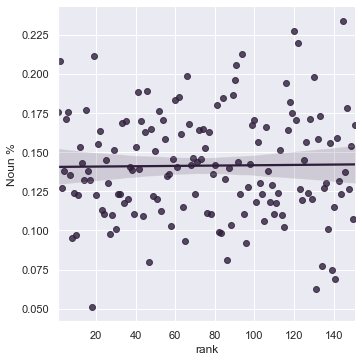

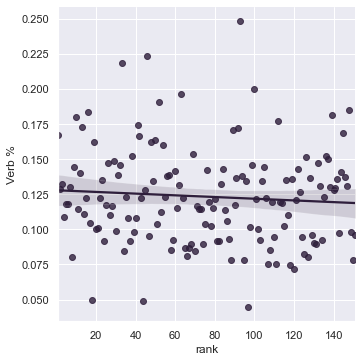

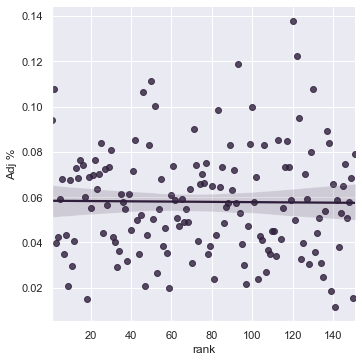

In [520]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualinsight2pt1():

    sns.set_style('darkgrid')
    df = insight2()
    
    sns.lmplot(y="Noun %", x="rank", data=df)
    plt.savefig("visnounpercent.png")

def visualinsight2pt2():

    sns.set_style('darkgrid')
    df = insight2()
    
    sns.lmplot(y="Verb %", x="rank", data=df)
    plt.savefig("visverbpercent.png")
    
def visualinsight2pt3():

    sns.set_style('darkgrid')
    df = insight2()
    
    sns.lmplot(y="Adj %", x="rank", data=df)
    plt.savefig("visadjpercent.png")


############ Function Call ############
visualinsight2pt1()
visualinsight2pt2()
visualinsight2pt3()

### Insight 2 Explanation

By counting the different parts of speech in Swift's songs, we can see if a higher percentage of certain parts of speech correlate to a better ranking. However, as we can visualize with the scatter plots, there appears to be a very weak or no relationship between these percentages and the ranking of Swift's songs.

### Insight 3

In [513]:
import nltk

def insight3():
    
    df = insight2()
    wordcountdf = pd.DataFrame()
    stopwordset = set(nltk.corpus.stopwords.words("english"))
    additionalstopwords = ["1", "ive" "2", "like", ",", "]", "[", "(", ")", "im", "chorus", "verse", "?", "dont", "youre", "oh", "na", "``", "''", "bridge", "pre-chorus", "’", ":", "outro", "intro", "taylor", "swift", "oh-oh", "ooh", "didnt"]
    
    for index in df.index:
        
        lyrics = df.loc[index, "Lyrics"]
        tokenizedlyrics = nltk.word_tokenize(lyrics)
        tokenspos = nltk.pos_tag(tokenizedlyrics)
        
        for token in tokenspos:
            word = token[0]
            pos = token[1]
            
            if "NN" in pos:
                pos = "N"
            elif "VB" in pos:
                pos = "VB"
            elif "JJ" in pos:
                pos = "ADJ"
            elif "RB" in pos:
                pos = "ADV"
            else:
                pos = "OTHER"
            
            if word not in stopwordset and word not in additionalstopwords:
                wordandpos = word + " (" + pos + ")"
                if wordandpos in wordcountdf.index:
                    wordcountdf.loc[wordandpos, "Total Count"] = wordcountdf.loc[wordandpos, "Total Count"] + 1
                else:
                    wordcountdf.loc[wordandpos, "Total Count"] = 1
                    wordcountdf.loc[wordandpos, "Part of Speech"] = pos
                    wordcountdf.loc[wordandpos, "Word"] = word
                   
    for index in df.index:
        
        wordcountdf.loc[:, index] = 0
        lyrics = df.loc[index, "Lyrics"]
        tokenizedlyrics = nltk.word_tokenize(lyrics)
        tokenspos = nltk.pos_tag(tokenizedlyrics)
        
        for token in tokenspos:
            word = token[0]
            pos = token[1]
            
            if "NN" in pos:
                pos = "N"
            elif "VB" in pos:
                pos = "VB"
            elif "JJ" in pos:
                pos = "ADJ"
            elif "RB" in pos:
                pos = "ADV"
            else:
                pos = "OTHER"
            
            if word not in stopwordset and word not in additionalstopwords:
                wordandpos = word + " (" + pos + ")"
                wordcountdf.loc[wordandpos, index] = wordcountdf.loc[wordandpos, index] + 1
    #nouns = wordcountdf[wordcountdf["Part of Speech"] == "N"]
    return wordcountdf.sort_values("Total Count", ascending = False)
    #return wordcountdf.sort_values("Total Count", ascending = False)

############ Function Call ############
insight3()

,Total Count,Part of Speech,Word,all too well,champagne problems,getaway car,cruel summer,cardigan,dear john,august,...,the last time,the outside,a perfectly good heart,come in with the rain,bad blood,superstar,superman,a place in this world,me!,girl at home
know (VB),433.0,VB,know,2,1,0,3,4,1,0,...,0,2,0,8,5,0,0,6,8,1
never (ADV),323.0,ADV,never,0,2,8,0,0,1,10,...,0,4,0,0,0,1,1,0,10,0
time (N),244.0,N,time,1,0,1,0,1,0,3,...,26,0,0,0,1,0,0,0,0,0
got (VB),206.0,VB,got,2,0,0,3,0,0,0,...,2,1,0,1,21,0,5,2,0,14
back (ADV),201.0,ADV,back,2,0,0,0,4,2,6,...,1,0,0,2,0,0,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
health (N),1.0,N,health,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
daddys (N),1.0,N,daddys,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
stopping (VB),1.0,VB,stopping,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
planning (VB),1.0,VB,planning,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


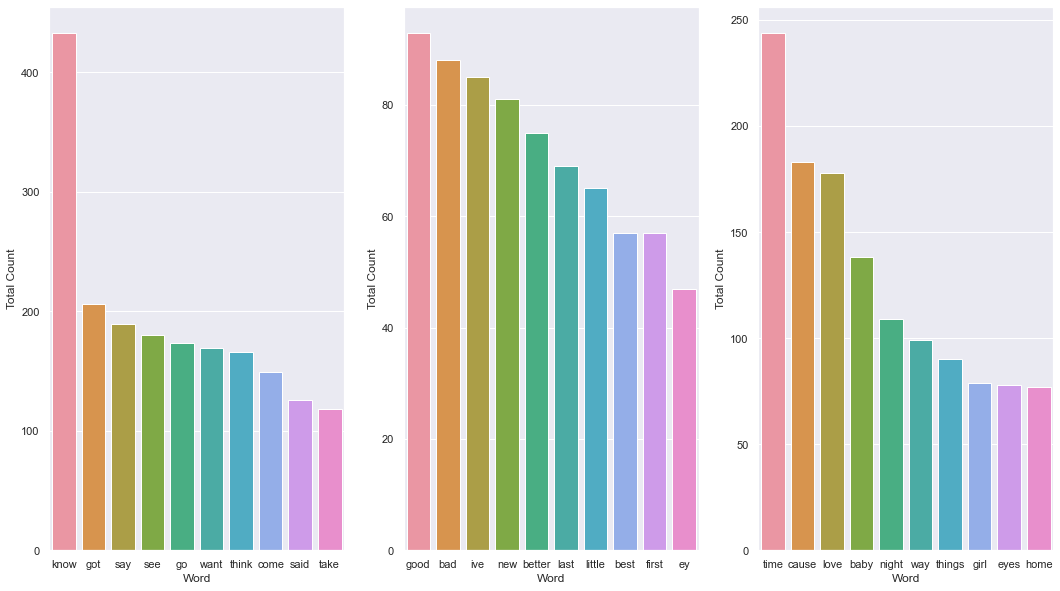

In [527]:
import matplotlib.pyplot as plt
import seaborn as sns
def visualinsight3():

    sns.set_style('darkgrid')
    fig, axes = plt.subplots(1, 3, figsize=(18, 10))
    df = insight3()
    
    df1 = df[df["Part of Speech"] == "VB"].iloc[0:10]
    sns.barplot(ax=axes[0], x = "Word", y = "Total Count", data=df1)
    
    df1 = df[df["Part of Speech"] == "ADJ"].iloc[0:10]
    sns.barplot(ax=axes[1], x = "Word", y = "Total Count", data=df1)
    
    df1 = df[df["Part of Speech"] == "N"].iloc[0:10]
    sns.barplot(ax=axes[2], x = "Word", y = "Total Count", data=df1)
    
    plt.savefig("viscommonwords.png")

############ Function Call ############
visualinsight3()

### Insight 3 Explanation

By counting all the number of times Swift uses certain words in her lyrics, we can see her most common words. Using these we can see recurring themes in her songs.

### Insight 4

In [445]:

def insight4():
    
    df = insight2()
    for index in df.index:
        df.loc[index, "Has Bridge"] = "[bridge" in df.loc[index, "Lyrics"]
    
    songswithnobridge = df[df["Has Bridge"] == False]
    return df

def insight4text():
    df = insight4()
    
    print("Average Rating for songs with a bridge: " + str(df[df["Has Bridge"] == True].loc[:, "rank"].mean()))
    print("Average Rating for songs without a bridge: " + str(df[df["Has Bridge"] == False].loc[:, "rank"].mean()))
    print("(Recall that a lower rating means the song is liked more)")
    print("")
    
    # Welch's T Test
    stat, p = ttest_ind(df[df["Has Bridge"] == True].loc[:, "rank"], df[df["Has Bridge"] == False].loc[:, "rank"])
    p /= 2 # we divide the p value by 2 because the ttest is two sided, but we want a one sided p value

    print("We can perform Welch's T test to test if there is a considerable difference in the ratings of Swift's songs with bridges versus without bridges")
    print("H0: The average ranking of Taylor Swift songs with and without bridges are equal")
    print("H1: The average ranking of Taylor Swift's songs with bridges is lower than that for her songs without bridges")
    print("The p value is: " + str(p))
    
    if p < 0.05:
        print("So we can reject the null and say that Taylor Swift's songs with bridges are liked better by fans")
    else:
        print("We fail to reject the null, so we CANNOT conclude that Taylor Swift's songs with bridges are more liked than those without bridges")
    
############ Function Call ############
insight4text()
insight4()

Average Rating for songs with a bridge: 74.67625899280576
Average Rating for songs without a bridge: 91.33333333333333
(Recall that a lower rating means the song is liked more)

We can perform Welch's T test to test if there is a considerable difference in the ratings of Swift's songs with bridges versus without bridges
H0: The average ranking of Taylor Swift songs with and without bridges are equal
H1: The average ranking of Taylor Swift's songs with bridges is lower than that for her songs without bridges
The p value is: 0.10331035622562235
We fail to reject the null, so we CANNOT conclude that Taylor Swift's songs with bridges are more liked than those without bridges


,rank,points,Album Number,Album,Track Number,Global Rank (Spotify),Rank (Spotify),Streams (Spotify),Lyrics,Danceability,...,Tempo,Sentiment Score,Word Count,Noun Count,Adj Count,Verb Count,Noun %,Adj %,Verb %,Has Bridge
all too well,1,15,4,Red,5,NaN,NaN,NaN,[intro] i walked through the door with you the...,0.602,...,93.060,8.0,467,82,44,78,0.175589,0.094218,0.167024,True
champagne problems,2,60,9,evermore,2,10.0,14.0,69917379.0,[verse 1] you booked the night train for a rea...,0.462,...,171.319,-20.0,288,60,31,37,0.208333,0.107639,0.128472,True
getaway car,3,103,6,Reputation,9,197.0,74.0,2166550.0,"[intro] no, nothing good starts in a getaway c...",0.562,...,172.054,-6.0,552,70,22,73,0.126812,0.039855,0.132246,True
cruel summer,4,111,7,Lover,2,16.0,20.0,53196462.0,"[intro] (yeah, yeah, yeah, yeah) [verse 1] fe...",0.552,...,169.994,-4.0,450,62,19,49,0.137778,0.042222,0.108889,True
cardigan,5,118,8,folklore,2,1.0,6.0,162035335.0,"[verse 1] vintage tee, brand new phone high he...",0.612,...,130.045,20.0,339,58,20,40,0.171091,0.058997,0.117994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
superstar,147,682,2,Fearless,5,NaN,NaN,NaN,[verse 1] this is wrong but i cant help but fe...,0.610,...,85.979,25.0,275,49,14,36,0.178182,0.050909,0.130909,True
superman,148,685,3,Speak Now,17,NaN,NaN,NaN,"[verse 1] tall, dark, and superman he puts pap...",0.582,...,131.982,9.0,379,48,22,70,0.126649,0.058047,0.184697,True
a place in this world,149,696,1,Taylor Swift,4,NaN,NaN,NaN,"[verse 1] i dont know what i want, so dont ask...",0.576,...,115.028,-12.0,234,36,16,23,0.153846,0.068376,0.098291,True
me!,150,701,7,Lover,16,13.0,3.0,250223140.0,[intro: taylor swift] i promise that youll nev...,0.610,...,182.162,93.0,513,55,8,40,0.107212,0.015595,0.077973,True


### Insight 4 Explanation

Taylor Swift is known for writing excellent bridges in her songs. By determining whether a song has a bridge or not, we can observe that the songs with a bridge have a better mean ranking than those without one. However, by doing a hypothesis test, we can observe that this difference is not statistically significant, meaning we cannot conclude songs with bridges are better on average than those without one.

### Insight 5

In [310]:

def insight5():
    df = insight4()
    keywords = {"Change" : ["change", "grow", "past", "remember", "time", "year", "years", "memory", "memories", "kid", "kids", "young", "story", "fifteen", "five", "thirteen", "three", "father", "brother", "sister", "lucky", "mamas", "daughter"],
               "Love" : ["love", "lover", "pretty", "feel", "felt", "kiss", "marry", "dreaming", "dream", "dreams", "vow", "belong", "heaven", "angel", "dance", "dress", "bed", "flawless", "brave", "follow", "perfect", "right", "gold", "golden", "heart", "grace", "truth", "touch", "breeze", "stay", "sparks", "church", "marrying", "tux", "gown"],
               "Sadness" : ["rains", "rain", "cursing", "wish", "gone", "break", "run", "remember", "why", "miss", "missing", "last", "end", "hurt", "down", "trying", "died", "sick", "never", "scared", "closure", "breathe", "late", "hate", "chance", "chances", "trouble", "troubling", "missing", "death", "blood", "goodbye", "red", "sad", "tragic", "lonely", "alone", "haunted"],
               "Fun" : ["dancing", "dance", "fun", "best", "happy", "dreaming", "dream", "dreams", "awesome", "rainbow", "never", "laugh", "song"]}
    df.loc[:, "Category"] = np.nan
    for index in df.index:
        lyrics = df.loc[index, "Lyrics"].replace(",", "").replace(".", "")
        changecount = 0
        lovecount = 0
        sadnesscount = 0
        funcount = 0
        for word in lyrics.split():
            if word in keywords["Change"]:
                changecount += 1
            if word in keywords["Love"]:
                lovecount += 1
            if word in keywords["Sadness"]:
                sadnesscount += 1
            if word in keywords["Fun"]:
                funcount += 1
        if changecount > lovecount and changecount > sadnesscount and changecount > funcount:
            df.loc[index, "Category"] = "Change"
        elif lovecount > changecount and lovecount > sadnesscount and lovecount > funcount:
            df.loc[index, "Category"] = "Love"
        elif sadnesscount > changecount and sadnesscount > lovecount and sadnesscount > funcount:
            df.loc[index, "Category"] = "Sadness"
        elif funcount > changecount and funcount > lovecount and funcount > sadnesscount:
            df.loc[index, "Category"] = "Fun"
        elif changecount == 0 and lovecount == 0 and sadnesscount == 0 and funcount == 0:
            print("None: " + index)
        else:
            print("Tie: " + index)
          
    return df


############ Function Call ############
insight5()

,rank,points,Album Number,Album,Track Number,Global Rank (Spotify),Rank (Spotify),Streams (Spotify),Lyrics,Danceability,...,Sentiment Score,Word Count,Noun Count,Adj Count,Verb Count,Noun %,Adj %,Verb %,Has Bridge,Category
all too well,1,15,4,Red,5.0,NaN,NaN,NaN,[intro] i walked through the door with you the...,0.602,...,8.0,467,82,44,78,0.175589,0.094218,0.167024,True,Sadness
champagne problems,2,60,9,evermore,2.0,10.0,14.0,69917379.0,[verse 1] you booked the night train for a rea...,0.462,...,-20.0,288,60,31,37,0.208333,0.107639,0.128472,True,Sadness
getaway car,3,103,6,Reputation,9.0,197.0,74.0,2166550.0,"[intro] no, nothing good starts in a getaway c...",0.562,...,-6.0,552,70,22,73,0.126812,0.039855,0.132246,True,Sadness
cruel summer,4,111,7,Lover,2.0,16.0,20.0,53196462.0,"[intro] (yeah, yeah, yeah, yeah) [verse 1] fe...",0.552,...,-4.0,450,62,19,49,0.137778,0.042222,0.108889,True,Love
cardigan,5,118,8,folklore,2.0,1.0,6.0,162035335.0,"[verse 1] vintage tee, brand new phone high he...",0.612,...,20.0,339,58,20,40,0.171091,0.058997,0.117994,True,Love
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
superstar,147,682,2,Fearless,5.0,NaN,NaN,NaN,[verse 1] this is wrong but i cant help but fe...,0.610,...,25.0,275,49,14,36,0.178182,0.050909,0.130909,True,Love
superman,148,685,3,Speak Now,17.0,NaN,NaN,NaN,"[verse 1] tall, dark, and superman he puts pap...",0.582,...,9.0,379,48,22,70,0.126649,0.058047,0.184697,True,Love
a place in this world,149,696,1,Taylor Swift,4.0,NaN,NaN,NaN,"[verse 1] i dont know what i want, so dont ask...",0.576,...,-12.0,234,36,16,23,0.153846,0.068376,0.098291,True,Sadness
me!,150,701,7,Lover,16.0,13.0,3.0,250223140.0,[intro: taylor swift] i promise that youll nev...,0.610,...,93.0,513,55,8,40,0.107212,0.015595,0.077973,True,Fun


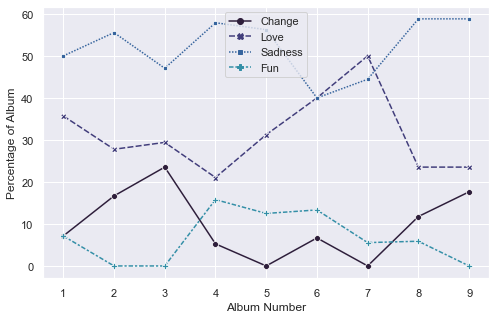

In [522]:
import seaborn as sns
def visualinsight5():
    
    sns.set_palette(sns.color_palette("mako"))
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize=(8, 5))
    indf = insight5()
    
    # Makes a new dataframe to indicate the counts of each type of song in each album
    outdf = pd.DataFrame(0, index = [1, 2, 3, 4, 5, 6, 7, 8, 9], columns = ["Change", "Love", "Sadness", "Fun"])
    for index in indf.index:
        albumnum = int(indf.loc[index, "Album Number"])
        cat = indf.loc[index, "Category"]
        outdf.loc[albumnum, cat] = outdf.loc[albumnum, cat] + 1
        
    outdf["Total"] = outdf.sum(axis = 1)
    
    # Converts the new dataframe from counts to percentages
    for index in outdf.index:
        outdf.loc[index] = outdf.loc[index]/outdf.loc[index, "Total"] * 100
    outdf = outdf.loc[:, "Change":"Fun"]
    
    
    ax = sns.lineplot(data=outdf, markers = True)
    ax.set(xlabel = "Album Number", ylabel = "Percentage of Album")
    

    plt.savefig("viscategorytrends.png")



############ Function Call ############
visualinsight5()

### Insight 5 Explanation

By categorizing each song, we can observe the trends in the topics that she writes about over time. For instance, we can see that there is a steady decline in "Fun" songs after album 4, and a growth in love songs between albums 4 and 7.

## Additional Data Visualizations

### Visualization 1

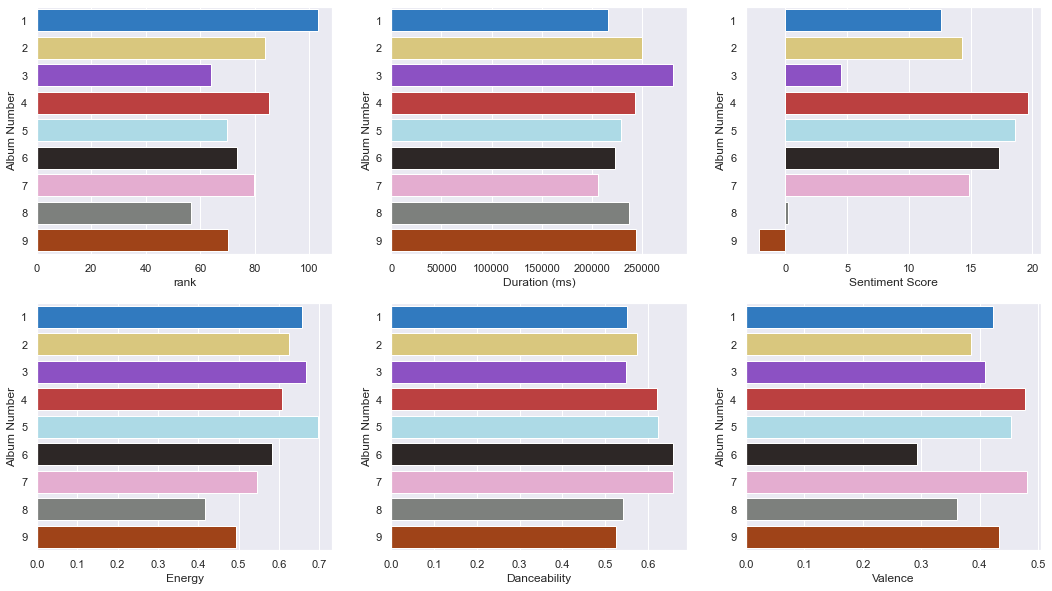

In [523]:
import matplotlib.pyplot as plt
import seaborn as sns
def visual1():
    colors = ["#1a7bd6", "#e8d06f", "#8d3ed6", "#cf2b2b", "#a3dff0", "#2e2625", "#eda4d2", "#7d807c", "#b53b02"]
    sns.set_palette(sns.color_palette(colors), n_colors = 9)
    sns.set_style('darkgrid')
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    df = insight5().groupby("Album Number").mean()
    
    sns.barplot(ax=axes[0, 0], y= df.index, x="rank", data=df)
    
    sns.barplot(ax=axes[0, 1], y= df.index, x="Duration (ms)", data=df)
    
    sns.barplot(ax=axes[0, 2], y= df.index, x="Sentiment Score", data=df)
    
    sns.barplot(ax=axes[1, 0], y= df.index, x="Energy", data=df)
    
    sns.barplot(ax=axes[1, 1], y= df.index, x="Danceability", data=df)
    
    sns.barplot(ax=axes[1, 2], y= df.index, x="Valence", data=df)
    
    plt.savefig("visalbumfeatures.png")


############ Function Call ############
visual1()

### Visualization 1 Explanation

Each of Taylor Swift's albums represent different eras of her life, and by using several features gathered during data collection, we can average them and observe trends among each album.

### Visualization 2

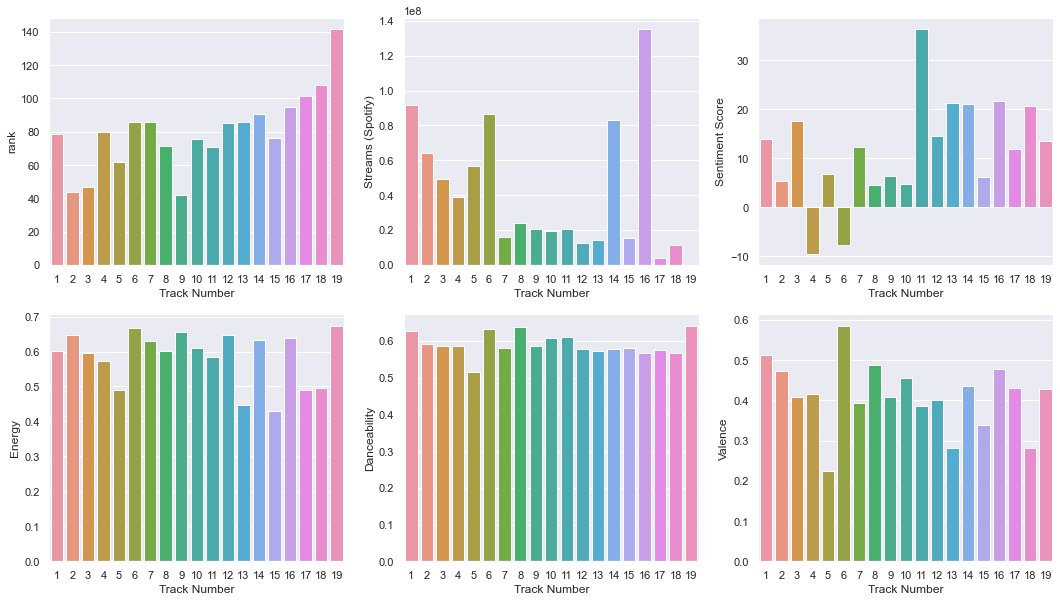

In [524]:
def visual2():
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    df = insight5().groupby("Track Number").mean()
    
    sns.barplot(ax=axes[0, 0], y="rank", x=df.index, data=df)
    
    sns.barplot(ax=axes[0, 1], x= df.index, y="Streams (Spotify)", data=df)
    
    sns.barplot(ax=axes[0, 2], x= df.index, y="Sentiment Score", data=df)
    
    sns.barplot(ax=axes[1, 0], x= df.index, y="Energy", data=df)
    
    sns.barplot(ax=axes[1, 1], x= df.index, y="Danceability", data=df)
    
    sns.barplot(ax=axes[1, 2], x= df.index, y="Valence", data=df)

    plt.savefig("vistrackfeatures.png")
    
############ Function Call ############
visual2()

### Visualization 2 Explanation

The order of Taylor Swift's albums are carefully chosen, so by comparing the means of the features gathered in data collection for each track number, we can observe trends for each album number. For instance, Taylor Swift's track 5's are always heavier, sad songs, and we can observe this in the low valence score.

### Visualization 3

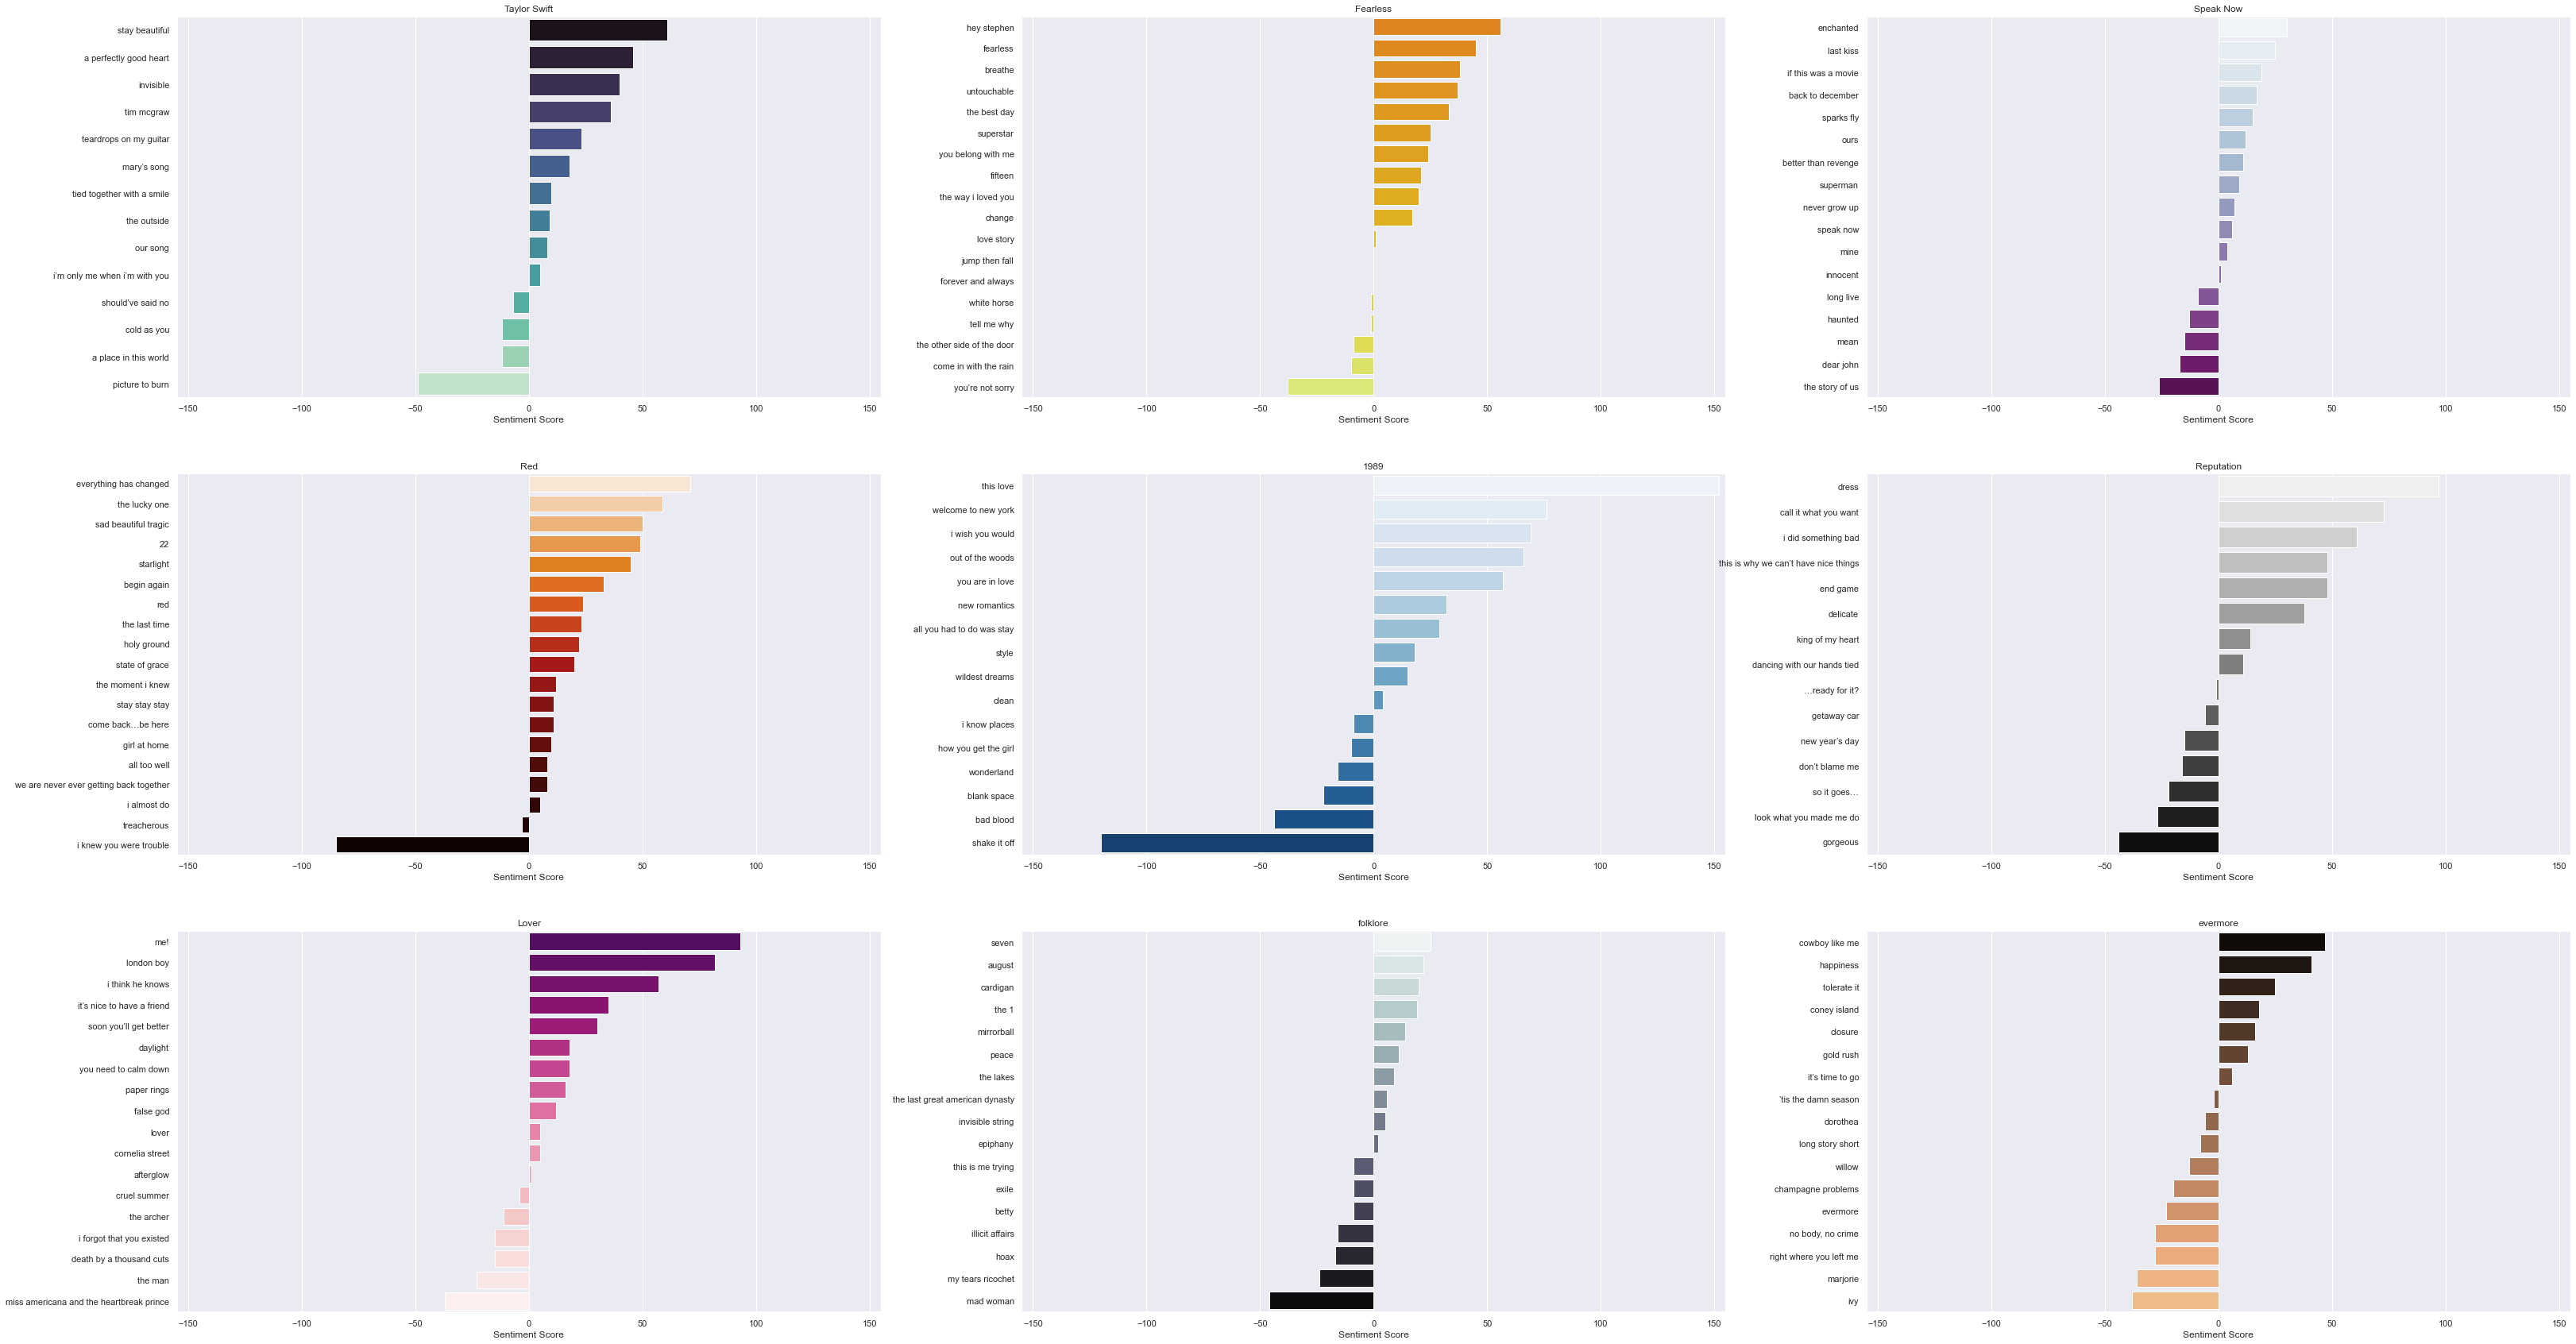

In [525]:

def visual3():

    sns.set_style('darkgrid')
    fig, axes = plt.subplots(3, 3, figsize=(54, 30))
    df = insight5()
    
    albumdf = df[df["Album"] == "Taylor Swift"].sort_values("Sentiment Score", ascending = False)
    a1 = sns.barplot(ax=axes[0, 0], y= albumdf.index, x="Sentiment Score", data=albumdf, palette = "mako")
    a1.set_title("Taylor Swift")
    a1.set_xlim([-155, 155])
    
    albumdf = df[df["Album"] == "Fearless"].sort_values("Sentiment Score", ascending = False)
    a2 = sns.barplot(ax=axes[0, 1], y= albumdf.index, x="Sentiment Score", data=albumdf, palette = "Wistia_r")
    a2.set_title("Fearless")
    a2.set_xlim([-155, 155])
    
    albumdf = df[df["Album"] == "Speak Now"].sort_values("Sentiment Score", ascending = False)
    a3 = sns.barplot(ax=axes[0, 2], y= albumdf.index, x="Sentiment Score", data=albumdf, palette = "BuPu")
    a3.set_title("Speak Now")
    a3.set_xlim([-155, 155])
    
    albumdf = df[df["Album"] == "Red"].sort_values("Sentiment Score", ascending = False)
    a4 = sns.barplot(ax=axes[1, 0], y= albumdf.index, x="Sentiment Score", data=albumdf, palette = "gist_heat_r")
    a4.set_title("Red")
    a4.set_xlim([-155, 155])
    
    albumdf = df[df["Album"] == "1989"].sort_values("Sentiment Score", ascending = False)
    a5 = sns.barplot(ax=axes[1, 1], y= albumdf.index, x="Sentiment Score", data=albumdf, palette = "Blues")
    a5.set_title("1989")
    a5.set_xlim([-155, 155])
    
    albumdf = df[df["Album"] == "Reputation"].sort_values("Sentiment Score", ascending = False)
    a6 = sns.barplot(ax=axes[1, 2], y= albumdf.index, x="Sentiment Score", data=albumdf, palette = "gist_gray_r")
    a6.set_title("Reputation")
    a6.set_xlim([-155, 155])
    
    albumdf = df[df["Album"] == "Lover"].sort_values("Sentiment Score", ascending = False)
    a7 = sns.barplot(ax=axes[2, 0], y= albumdf.index, x="Sentiment Score", data=albumdf, palette = "RdPu_r")
    a7.set_title("Lover")
    a7.set_xlim([-155, 155])
    
    albumdf = df[df["Album"] == "folklore"].sort_values("Sentiment Score", ascending = False)
    a8 = sns.barplot(ax=axes[2, 1], y= albumdf.index, x="Sentiment Score", data=albumdf, palette = "bone_r")
    a8.set_title("folklore")
    a8.set_xlim([-155, 155])
    
    albumdf = df[df["Album"] == "evermore"].sort_values("Sentiment Score", ascending = False)
    a9 = sns.barplot(ax=axes[2, 2], y= albumdf.index, x="Sentiment Score", data=albumdf, palette = "copper")
    a9.set_title("evermore")
    a9.set_xlim([-155, 155])
    
    plt.savefig("vissentimentscores.png")

############ Function Call ############
visual3()

### Visualization 3 Explanation

Using the sentiment scores calculated earlier, we can plot each song for each album and observe the range of sentiment on the album, and easily see the most and least positive songs.

### Visualization 4

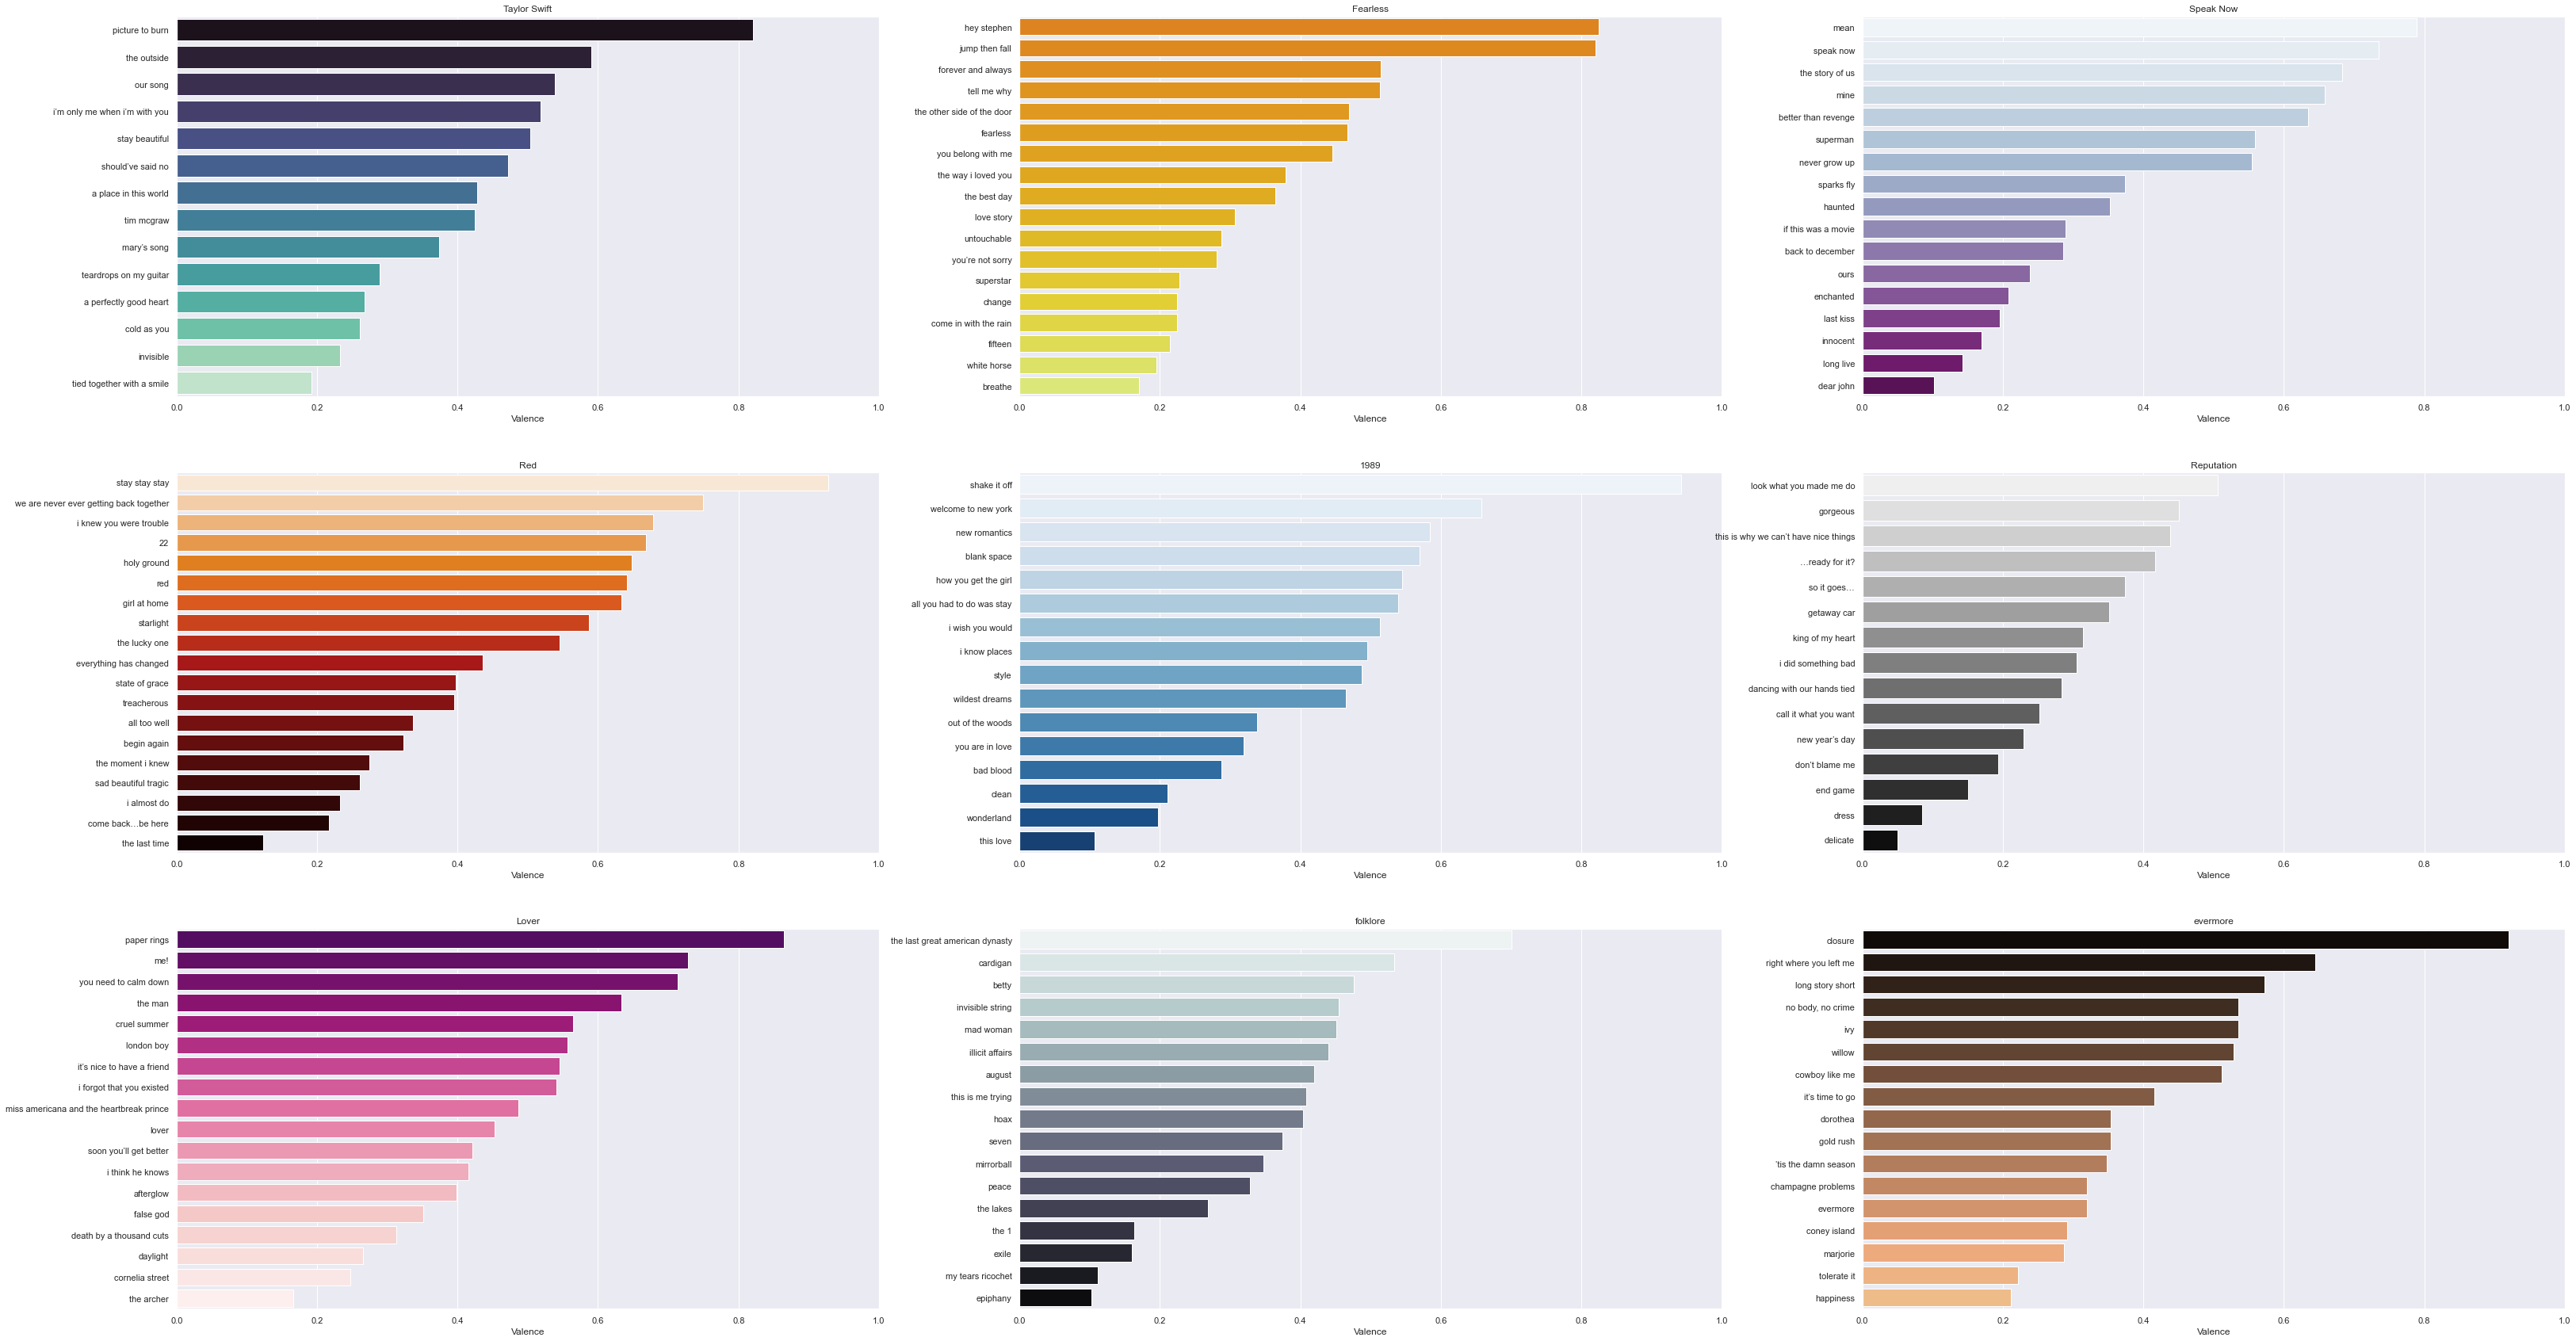

In [526]:

def visual4():
    colors = ["#1a7bd6", "#e8d06f", "#8d3ed6", "#cf2b2b", "#a3dff0", "#2e2625", "#eda4d2", "#7d807c", "#b53b02"]
    #sns.set_palette(sns.color_palette(colors), n_colors = 9)
    sns.set_style('darkgrid')
    fig, axes = plt.subplots(3, 3, figsize=(54, 30))
    df = insight5()
    
    albumdf = df[df["Album"] == "Taylor Swift"].sort_values("Valence", ascending = False)
    a1 = sns.barplot(ax=axes[0, 0], y= albumdf.index, x="Valence", data=albumdf, palette = "mako")
    a1.set_title("Taylor Swift")
    a1.set_xlim([0, 1])
    
    albumdf = df[df["Album"] == "Fearless"].sort_values("Valence", ascending = False)
    a2 = sns.barplot(ax=axes[0, 1], y= albumdf.index, x="Valence", data=albumdf, palette = "Wistia_r")
    a2.set_title("Fearless")
    a2.set_xlim([0, 1])
    
    albumdf = df[df["Album"] == "Speak Now"].sort_values("Valence", ascending = False)
    a3 = sns.barplot(ax=axes[0, 2], y= albumdf.index, x="Valence", data=albumdf, palette = "BuPu")
    a3.set_title("Speak Now")
    a3.set_xlim([0, 1])
    
    albumdf = df[df["Album"] == "Red"].sort_values("Valence", ascending = False)
    a4 = sns.barplot(ax=axes[1, 0], y= albumdf.index, x="Valence", data=albumdf, palette = "gist_heat_r")
    a4.set_title("Red")
    a4.set_xlim([0, 1])
    
    albumdf = df[df["Album"] == "1989"].sort_values("Valence", ascending = False)
    a5 = sns.barplot(ax=axes[1, 1], y= albumdf.index, x="Valence", data=albumdf, palette = "Blues")
    a5.set_title("1989")
    a5.set_xlim([0, 1])
    
    albumdf = df[df["Album"] == "Reputation"].sort_values("Valence", ascending = False)
    a6 = sns.barplot(ax=axes[1, 2], y= albumdf.index, x="Valence", data=albumdf, palette = "gist_gray_r")
    a6.set_title("Reputation")
    a6.set_xlim([0, 1])
    
    albumdf = df[df["Album"] == "Lover"].sort_values("Valence", ascending = False)
    a7 = sns.barplot(ax=axes[2, 0], y= albumdf.index, x="Valence", data=albumdf, palette = "RdPu_r")
    a7.set_title("Lover")
    a7.set_xlim([0, 1])
    
    albumdf = df[df["Album"] == "folklore"].sort_values("Valence", ascending = False)
    a8 = sns.barplot(ax=axes[2, 1], y= albumdf.index, x="Valence", data=albumdf, palette = "bone_r")
    a8.set_title("folklore")
    a8.set_xlim([0, 1])
    
    albumdf = df[df["Album"] == "evermore"].sort_values("Valence", ascending = False)
    a9 = sns.barplot(ax=axes[2, 2], y= albumdf.index, x="Valence", data=albumdf, palette = "copper")
    a9.set_title("evermore")
    a9.set_xlim([0, 1])
    
    plt.savefig("visvalence.png")

############ Function Call ############
visual4()

### Visualization 4 Explanation

Similar to visualization 3, using the valence scores calculated, we can plot each song for each album and observe the range of valence on the album, and easily see the most and least positive songs. Also, since valence and sentiment score represent similar features, we can compare their results and assess which one is a better representation of the mood of a song.

## Summary Files

In [531]:
def summary1():
    
    df = insight5()
    writer = pd.ExcelWriter("TSwiftSummaryFile.xlsx")
    df.to_excel(writer)
    writer.save()


############ Function Call ############
summary1()

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:

*   Modules Used:
    - AFINN: https://pypi.org/project/afinn/
    - NLTK: https://www.nltk.org/
    - SEABORN: https://seaborn.pydata.org/#
    - SCIPY: https://www.scipy.org/
*   Websites that helped with code:
    - For spotify api authorization: https://dev.to/mxdws/using-python-with-the-spotify-api-1d02
    - For SciPy assistance: https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/



# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Link: https://youtu.be/lUZR61YefEQ
*   Slides: https://docs.google.com/presentation/d/11oYRVfzuBR9tm3RRvODCeIpiLLCErg9Mj8g8vgINTR4/edit?usp=sharing


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
